## Question 1 - Extracting Tesla Stock Data Using yfinance

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index to have Date as a column
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [4]:
import requests
from bs4 import BeautifulSoup

# Get Tesla revenue data from Macrotrends
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url_tesla).text

soup = BeautifulSoup(html_data, "html.parser")

# Extract table rows
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date],"Revenue":[revenue]})], ignore_index=True)

# Clean revenue data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [5]:
# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [6]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url_gme).text

soup = BeautifulSoup(html_data, "html.parser")

# Extract revenue table
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date],"Revenue":[revenue]})], ignore_index=True)

# Clean revenue data
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.head()

,Date,Revenue


## Question 5 - Tesla Stock and Revenue Dashboard

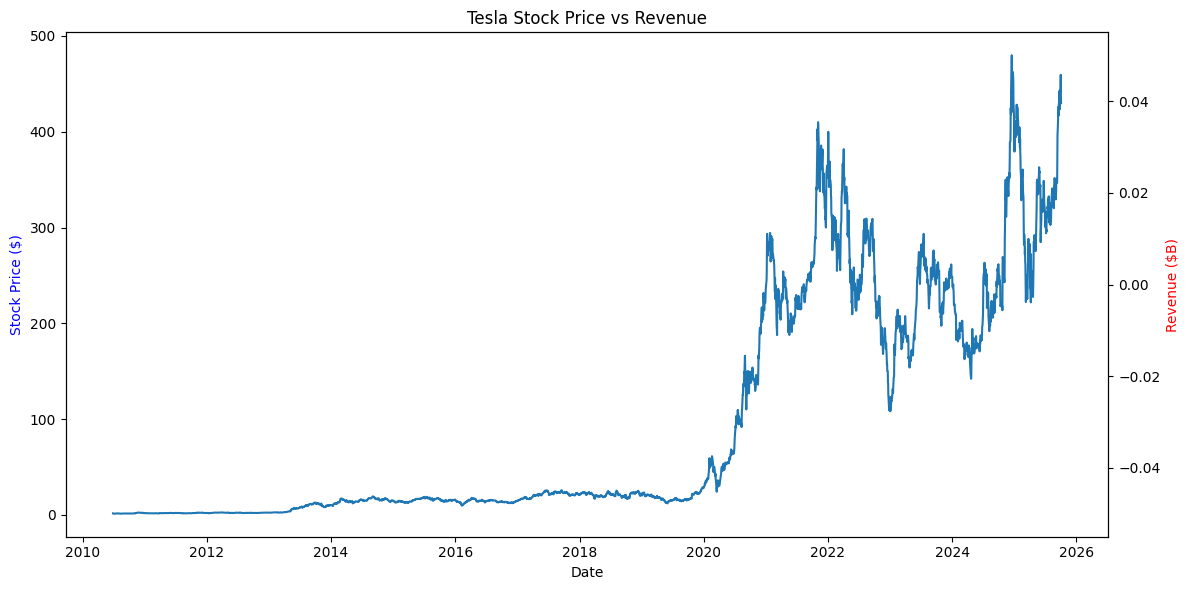

In [7]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)", color="blue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label="Revenue", color="red")
    ax2.set_ylabel("Revenue ($B)", color="red")

    plt.title(f"{stock_name} Stock Price vs Revenue")
    fig.tight_layout()
    plt.show()

# Tesla Dashboard
make_graph(tesla_data, tesla_revenue, "Tesla")

## Question 6 - GameStop Stock and Revenue Dashboard

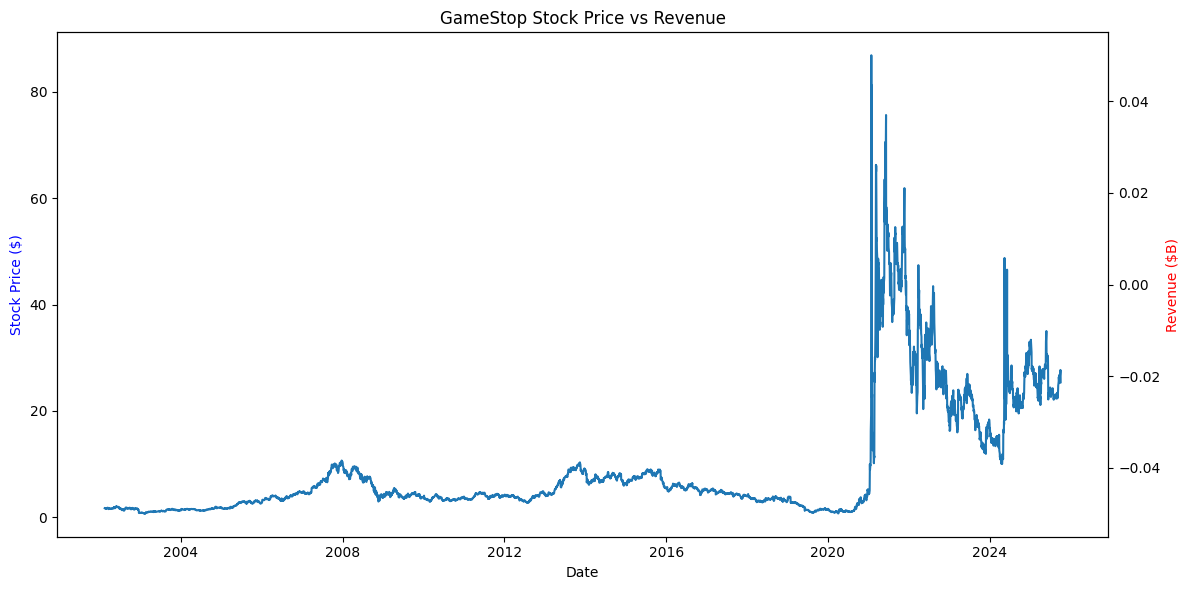

In [8]:
# GameStop Dashboard
make_graph(gme_data, gme_revenue, "GameStop")